# Fast Fourier Transform bass 42 Hz
### Alastair McLean
How to calculate the power spectrum of an audio file. In this example, I use a recording I made on my flute of A = 440 Hz. I tried to keep the note as constant as possible. 

In [17]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [18]:
def w(f):
    return 2*np.pi * f

In [19]:
def powerspectrum(real, imag):
    return np.sqrt(real**2+imag**2)

### This code is a modified version of sample code from effbot.org

http://effbot.org/librarybook/aifc.htm

- The sampwidth is the size of each sample in bytes. This is converted to bits below. 
- The samplingrate is the number of times a second the audio file is sampled.
- nframes is the number of samples that were taken

In [20]:
import aifc

a = aifc.open("../audio/bass-42Hz.aif", "r")

if a.getnchannels() == 1:
    print("mono,"),
else:
    print("stereo,"),
    
sampwidth = a.getsampwidth()*8 
samplingrate = a.getframerate()
nframes = a.getnframes()
data = a.readframes(nframes)

factor = 2.0 # gives the correct frequency for my recordings
dt = 1/(factor*samplingrate)   

print(sampwidth , "bits,")
print("Sampling rate =", samplingrate, "Hz" )
print("Sampling interval = {:6.3e} s".format(dt))
print("Size of audio file =", len(data), "bytes")

stereo,
16 bits,
Sampling rate = 44100 Hz
Sampling interval = 1.134e-05 s
Size of audio file = 2621440 bytes


### Convert to numpy array

This code converts the audio file into a numpy array. I use the shape command to see how many samples (points) are in the audio file. I also divide the data set by the maximum value because the absolute amplitude of the wave is not important in this example. 

In [21]:
y = np.fromstring(data, np.short).byteswap()
y = y/y.max()
print(y.shape)

(1310720,)


I plot the audio file to check if there are parts of the file that I should omit. In this case the file is actually longer than the recordings and I have some zeros at the end that I should not include in the fourier transform.

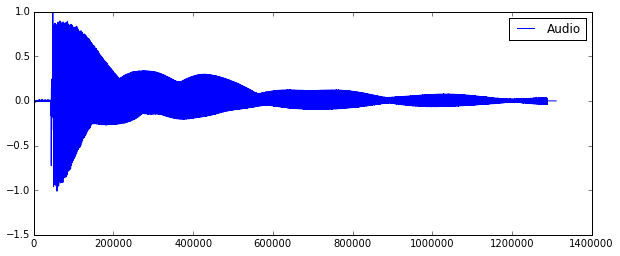

In [22]:
plt.figure(0, figsize=(10, 4))
plt.plot(y, label = 'Audio')
plt.legend(loc='upper right')
plt.show()

I decide to truncate the file at 700000.

In [23]:
wave = y[100000: 1200000]
print(wave.shape)

(1100000,)


Here is a plot of the truncated file with the zeros at the end of the recording eliminated.

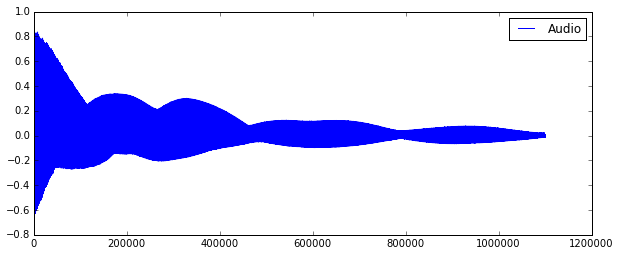

In [24]:
plt.figure(0, figsize=(10, 4))
plt.plot(wave, label = 'Audio')
plt.legend(loc='upper right')
plt.show()

### Calculate the power spectrum of the audio file

First, the Fourier transform of the wave is calculated. This has a real and an imaginary part. To plot the power spectrum we have to calculate the modulus of the complex number. 

In [25]:
wavefft = fftpack.fft(wave)                      # FFT of the wave
f = fftpack.fftfreq(wave.size, dt)               # frequencies 
f = fftpack.fftshift(f)                          # shift frequencies from min to max
wavefftshift = fftpack.fftshift(wavefft)         # shift wavefft order to correspond to f
power = powerspectrum(np.real(wavefftshift), np.imag(wavefftshift))  # calculate the power spectrum

### A vector to hold the time values

In [26]:
t = np.arange(start = 0., stop = dt * wave.size, step = dt)

###Plot the audio file and the power spectrum

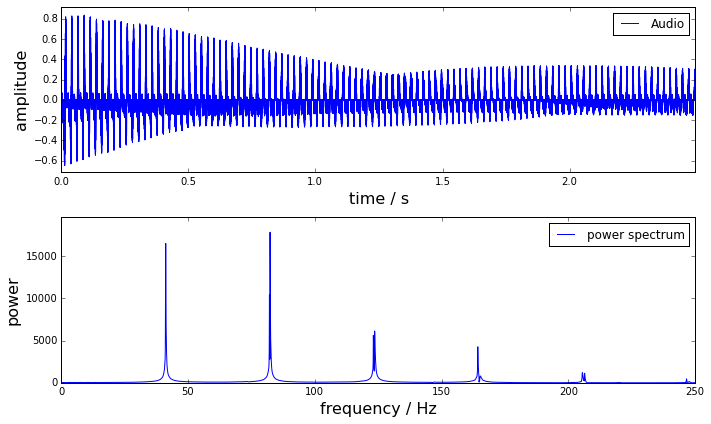

In [29]:
fig = plt.figure(1, figsize=(10,6), frameon = False)
fig.add_subplot(211)
wave_max = 1.1*np.max(wave)
wave_min = 1.1*np.min(wave)
plt.plot(t, wave, color='blue', label='Audio')
plt.legend(loc='upper right')
plt.xlabel('time / s', fontsize = 16)
plt.ylabel('amplitude', fontsize = 16)
fraction = 0.2 # the fraction of the file to plot
plt.axis([0., fraction*dt*wave.size, wave_min, wave_max])

fig.add_subplot(212)
power_max = 1.1*np.max(power)
plt.plot(f, power, color='blue', label='power spectrum')
plt.legend(loc='upper right')
plt.xlabel('frequency / Hz', fontsize = 16)
plt.ylabel('power', fontsize = 16)
plt.axis([0, +250., 0, power_max])
fig.tight_layout() # creates space
plt.show()